## Functional annotation of TotalRNA against NCyc

This notebook is part of the analysis of the MAGs. 

## How to run Jupyter notebooks in huginn
<details>
<summary>Click to expand!</summary>

If you use vs-code you can use the [remote ssh extension](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-ssh) to connect to huginn and either run jupyterlab in the remote server (so to say, just like you would do in your local computer with `jupyter-lab`) or run directly without opening jupyterlab directly. 

Otherwise, you can follow the instructions below: 

1. Turn on VPN
2. Open two terminals (let's called A and B)
3. With terminal A, connect to huginn with ssh as usual
```bash
ssh username@huginn.au.dk
```
4. Move to the directory where you want to work, activate the conda enviroment and run jupyter notebook or jupyter lab:
```bash
conda activate jupyter-diamond
jupyter notebook --no-browser --port=7777
```
5. With terminal B, connect to huginn and forward the port specified port to your local computer
```bash
ssh -Y -N -L localhost:7777:localhost:7777 username@huginn.au.dk
```
6. Open your browser and go to `localhost:7777` and you should see the jupyter notebook running in huginn. You can also press in the url of Terminal A. 

Troubleshooting:
- If you get an error like `bind: Address already in use` it means that you have another jupyter notebook running in the same port. You can either kill the process or change the port.
</details>

## How to create a new environment for this notebook (if needed)

We will use Diamond, a few python basic libraries and bash. Let's check if those dependencies are installed. If not, you can install them with mamba (as well with jupyterlab)

```bash
# To create a new environment with mamba
mamba create -c bioconda -c conda-forge diamond pandas matplotlib jupyterlab -n jupyter-diamond
# To activate the environment
conda activate jupyter-diamond
```

### Sanity check

In [1]:
%%bash
diamond --version
python -c "import pandas; print(pandas.__version__)"
python -c "import matplotlib; print(matplotlib.__version__)"
bash --version | head -n 1

diamond version 2.1.8
1.1.5
3.3.4
GNU bash, version 4.4.20(1)-release (x86_64-pc-linux-gnu)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

The input is the fasta file with contigs and the count table. 

In [3]:
fasta_file = "../data/mags.fasta"
count_table = "../data/mags.tsv"
## Sanity check: trinity and count table exit
assert os.path.exists(fasta_file), "Fasta file does not exist"
assert os.path.exists(count_table), "Count table does not exist"

## Run Diamond 

In [4]:
database = '/data_2/Databases/NCyc/NCyc_100.dmnd'
outfile_matches = "../results/NCyc_matches_mags.tsv"

In [5]:
%%bash
mkdir -p ../results/

**Please, be aware that, without using any sensitivity option, the default mode is designed for finding hits of >60% identity. Consider increasing the sensitivity (or decreasing it).**

In [6]:
%%bash -s "$database" "$fasta_file" "$outfile_matches"
if [ ! -f $3 ]; then
diamond blastx -p 50 -d $1 -q $2 -o $3 2> /dev/null
fi
head $3

bin_1.fasta_00004	299a598c87f8dff4d8a244c7ce0d551d	31.3	528	332	9	337	1860	37	553	2.43e-48	184
bin_1.fasta_00004	e82777a1327708f50508d1b125405a70	31.7	482	310	6	460	1860	75	552	1.51e-47	181
bin_1.fasta_00004	dge:Dgeo_2849	31.5	483	312	6	457	1860	75	553	2.06e-47	181
bin_1.fasta_00004	374312852	31.4	500	317	11	445	1878	63	558	5.20e-47	180
bin_1.fasta_00004	3b3372ed3547e894c469c2d95b52e826	32.8	503	296	12	457	1878	73	562	1.00e-46	179
bin_1.fasta_00004	83406.HDN1F_36030	31.2	523	332	12	349	1860	28	541	2.11e-46	178
bin_1.fasta_00004	b5619b97b9062a05a0e17eea64cc7503	30.5	535	340	11	349	1878	57	584	2.35e-46	178
bin_1.fasta_00004	119f6236a42f2c727ff7ad9e89cc6445	29.9	489	322	8	460	1872	71	556	1.10e-45	176
bin_1.fasta_00004	48a653f01bb415488b8ef8f5251183e7	30.5	544	331	10	379	1878	1	541	1.24e-45	176
bin_1.fasta_00004	6be114e7faa593fc5b22a3249584f32e	31.2	548	346	12	319	1878	35	579	1.39e-45	176


## Parse Diamond output and preprocess

In [7]:
diamond = pd.read_csv(
    outfile_matches,
    delimiter="\t",
    comment="#",
    header=None,
    names=[
        "Query id",
        "Subject id",
        "% identity",
        "alignment length",
        "mismatches",
        "gap openings",
        "q. start",
        "q. end",
        "s. start",
        "s. end",
        "e-value",
        "score",
    ],
)

Now, we have a table with all the alignments between our "genes" and the database.

In [8]:
diamond

,Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
0,bin_1.fasta_00004,299a598c87f8dff4d8a244c7ce0d551d,31.3,528,332,9,337,1860,37,553,2.430000e-48,184.0
1,bin_1.fasta_00004,e82777a1327708f50508d1b125405a70,31.7,482,310,6,460,1860,75,552,1.510000e-47,181.0
2,bin_1.fasta_00004,dge:Dgeo_2849,31.5,483,312,6,457,1860,75,553,2.060000e-47,181.0
3,bin_1.fasta_00004,374312852,31.4,500,317,11,445,1878,63,558,5.200000e-47,180.0
4,bin_1.fasta_00004,3b3372ed3547e894c469c2d95b52e826,32.8,503,296,12,457,1878,73,562,1.000000e-46,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...
111256,bin_8.fasta_03040,7245.FBpp0268934,42.9,170,96,1,19,525,10,179,2.190000e-49,160.0
111257,bin_8.fasta_03040,dse:Dsec_GM23540,42.8,173,98,1,19,534,10,182,6.230000e-49,159.0
111258,bin_8.fasta_03040,7227.FBpp0083854,43.4,173,97,1,19,534,37,209,2.800000e-48,158.0
111259,bin_8.fasta_03040,8de26b04199dbe78a87c28a4f2df26d0,44.5,173,94,2,19,534,39,210,2.890000e-48,158.0


## Read count table
However, we also need to read the count table:

In [9]:
%%bash -s "$count_table"
head $1

ContigID	ika_mgs_val_2	ika_mgs_val_1
bin_37.fasta_02940	31	30
bin_36.fasta_03910	123	129
bin_11.fasta_01027	88	97
bin_1.fasta_02543	25	21
bin_71.fasta_02748	93	92
bin_3.fasta_02341	43	47
bin_38.fasta_03427	12	13
bin_41.fasta_00268	13	8
bin_24.fasta_00934	23	21


In [10]:
counts = pd.read_csv(count_table, sep="\t", comment="#").set_index("ContigID")
# Check that there are only 2 columns
assert counts.shape[1] == 2, "Count table should have 2 columns"
# Sum the counts for each MAG
counts = counts.sum(axis=1)
# Convert to a dataframe
counts = pd.DataFrame(counts, columns=["Count"])
counts

,Count
ContigID,
bin_37.fasta_02940,61
bin_36.fasta_03910,252
bin_11.fasta_01027,185
bin_1.fasta_02543,46
bin_71.fasta_02748,185
...,...
bin_61.fasta_00597,47
bin_36.fasta_03334,395
bin_37.fasta_02681,53


## Preprocessing
### Most significant hit per Contig

Now, we need to get the most significant hit per each contig ID. Let's inspect how many hits there are per contig (adjust the number of bins). 

Text(0.5, 1.0, 'Number of hits per contig')

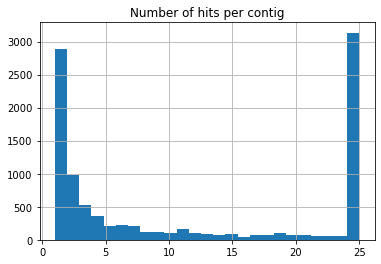

In [11]:
diamond.pivot_table(columns=["Query id"], aggfunc="size").hist(bins=25)
plt.title("Number of hits per contig")

In this case, we are going to sort rows per e-value and score and get the most significant hit per each ContigId.

In [12]:
diamond = (
    diamond.sort_values(by=["e-value", "score"], ascending=[True, False])
    .drop_duplicates("Query id", keep="first")
    .set_index("Query id")
)
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
bin_29.fasta_00596,K9TLN3,97.3,1529,42,0,1,4587,1,1529,0.000000,2962.0
bin_29.fasta_03685,K9TNI4,95.6,1552,69,0,1,4656,1,1552,0.000000,2954.0
bin_33.fasta_03455,W0DIB7,87.2,1557,199,0,1,4671,1,1557,0.000000,2771.0
bin_37.fasta_01091,W0DIB7,87.2,1557,200,0,1,4671,1,1557,0.000000,2770.0
bin_2.fasta_01951,Q3SF94,89.9,1494,151,0,1,4482,1,1494,0.000000,2699.0
...,...,...,...,...,...,...,...,...,...,...,...
bin_52.fasta_03134,A0A1S7QIQ6,33.3,87,50,3,130,366,48,134,0.000973,39.3
bin_16.fasta_00993,9dbbedcb8253608183316c5cedaac241,34.0,94,51,5,1,276,3,87,0.000978,39.3
bin_65.fasta_01696,f625b710850e3b57ef1a5dd3a2e4b00d,51.9,54,24,1,16,171,4,57,0.000979,39.3


### Inspect E-values from aligned orthologous genes before filtering by e-value

array([[<AxesSubplot:title={'center':'e-value'}>]], dtype=object)

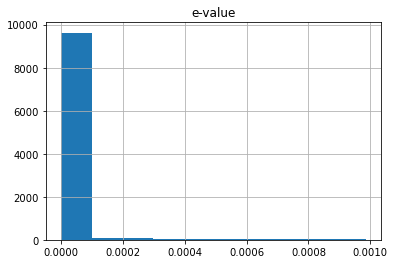

In [13]:
diamond.hist("e-value")

### Inspect E-values from aligned orthologous genes after filtering by e-value

We need to set a threshold:

In [14]:
evalue_threshold = 0.0001

In [15]:
diamond = diamond.loc[diamond["e-value"] < evalue_threshold]

array([[<AxesSubplot:title={'center':'e-value'}>]], dtype=object)

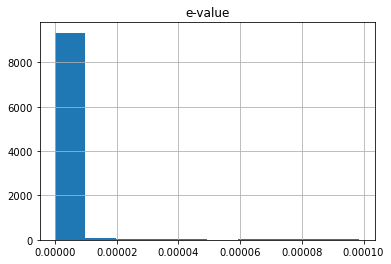

In [16]:
diamond.hist("e-value")

In [17]:
val = len(set(diamond["Subject id"]))
print(f"There are {val} unique orthologous genes")

There are 3173 unique orthologous genes


### Inspect % identity and aligment length

array([[<AxesSubplot:title={'center':'alignment length'}>]], dtype=object)

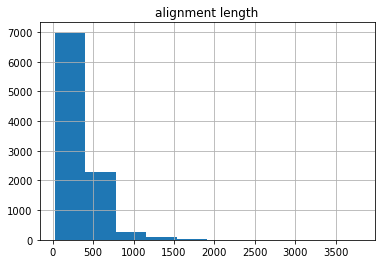

In [18]:
diamond.hist("alignment length")

array([[<AxesSubplot:title={'center':'% identity'}>]], dtype=object)

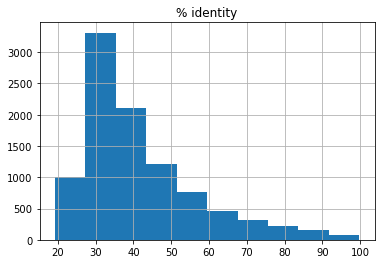

In [19]:
diamond.hist("% identity")

In [20]:
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
bin_29.fasta_00596,K9TLN3,97.3,1529,42,0,1,4587,1,1529,0.000000,2962.0
bin_29.fasta_03685,K9TNI4,95.6,1552,69,0,1,4656,1,1552,0.000000,2954.0
bin_33.fasta_03455,W0DIB7,87.2,1557,199,0,1,4671,1,1557,0.000000,2771.0
bin_37.fasta_01091,W0DIB7,87.2,1557,200,0,1,4671,1,1557,0.000000,2770.0
bin_2.fasta_01951,Q3SF94,89.9,1494,151,0,1,4482,1,1494,0.000000,2699.0
...,...,...,...,...,...,...,...,...,...,...,...
bin_71.fasta_02873,e2a3e2863edd599d8dec437de7cfa7b4,29.7,165,101,5,7,480,1861,2017,0.000095,46.2
bin_3.fasta_02636,51dbd0df720806ed3d7f7f0fe2428c3e,24.5,204,112,7,553,1125,312,486,0.000095,48.1
bin_38.fasta_02900,644548.SCNU_15694,26.1,165,94,5,622,1059,294,449,0.000096,47.4


Text(0, 0.5, 'Mistmatches')

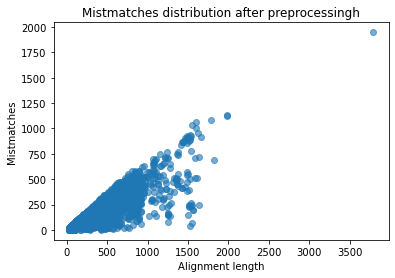

In [21]:
plt.scatter(diamond["alignment length"], diamond.mismatches, alpha=0.6)
plt.title("Mistmatches distribution after preprocessingh")
plt.xlabel("Alignment length")
plt.ylabel("Mistmatches")

## Attention !!
Please, consider the previous information to set the threshold for the e-value and the % identity.

### Merging aligned genes and count table
First, we are going to drop all columns except for ContigsID and orthologous genes header (to obtain map table). 

In [22]:
map_table = diamond[["Subject id"]]
map_table

,Subject id
Query id,
bin_29.fasta_00596,K9TLN3
bin_29.fasta_03685,K9TNI4
bin_33.fasta_03455,W0DIB7
bin_37.fasta_01091,W0DIB7
bin_2.fasta_01951,Q3SF94
...,...
bin_71.fasta_02873,e2a3e2863edd599d8dec437de7cfa7b4
bin_3.fasta_02636,51dbd0df720806ed3d7f7f0fe2428c3e
bin_38.fasta_02900,644548.SCNU_15694


Now, we create an extra column with the bin name.

In [23]:
# Get everything before first '.'
map_table['bin'] = map_table.index.str.split(".").str[0] 
map_table

/software/anaconda3/envs/jupyter-diamond/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Subject id,bin
Query id,,
bin_29.fasta_00596,K9TLN3,bin_29
bin_29.fasta_03685,K9TNI4,bin_29
bin_33.fasta_03455,W0DIB7,bin_33
bin_37.fasta_01091,W0DIB7,bin_37
bin_2.fasta_01951,Q3SF94,bin_2
...,...,...
bin_71.fasta_02873,e2a3e2863edd599d8dec437de7cfa7b4,bin_71
bin_3.fasta_02636,51dbd0df720806ed3d7f7f0fe2428c3e,bin_3
bin_38.fasta_02900,644548.SCNU_15694,bin_38


Now, we are going to merge both files by their column in common (ContigID and Subject id).

In [24]:
df = pd.merge(map_table, counts, left_index=True, right_index=True).reset_index(
    drop=True
)
df

,Subject id,bin,Count
0,K9TLN3,bin_29,499
1,K9TNI4,bin_29,484
2,W0DIB7,bin_33,1950
3,W0DIB7,bin_37,537
4,Q3SF94,bin_2,526
...,...,...,...
9621,e2a3e2863edd599d8dec437de7cfa7b4,bin_71,126
9622,51dbd0df720806ed3d7f7f0fe2428c3e,bin_3,184
9623,644548.SCNU_15694,bin_38,48
9624,746bfefb305764510e17edfeb4ce9f3e,bin_10,64


Finally, we are going to make the table wider (from long format to wide format) and fill the empty values with 0. 

In [25]:
df_transformed = df.pivot_table(index='Subject id', columns='bin', values='Count', fill_value=0, aggfunc='sum')
df_transformed.reset_index(inplace=True)
df_transformed.columns.name = None
# Arrange columns so Subject id is first, then sort
df_transformed = df_transformed[["Subject id"] + sorted(df_transformed.columns[1:])]
df_transformed


,Subject id,bin_1,bin_10,bin_11,bin_16,bin_17,bin_2,bin_24,bin_26,bin_27,...,bin_38,bin_39,bin_41,bin_48,bin_52,bin_61,bin_65,bin_68,bin_71,bin_8
0,000c5cb581b23dd6ec6800a283686cb5,97,1,0,0,0,68,61,0,0,...,0,0,0,0,0,0,0,0,0,65
1,001bee9fa05bbe4d5a0cf6705b78d14f,0,0,0,0,0,0,0,0,0,...,0,0,0,73,0,0,0,0,0,0
2,0020505018faa27b4251100f312d6b13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,209,0,0,0,0,0
3,00559da74c561a5034f7caca7f1a7cb5,0,0,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,007fce70cac38862f1b6780897c2c240,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,71,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,tin:Tint_2164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3169,vcn:VOLCADRAFT_75431,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3170,xal:XALc_1348,0,0,0,131,0,118,568,0,359,...,0,0,0,0,63,0,0,0,382,0
3171,xal:XALc_2831,0,0,0,299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Annotating count table

The original annotation involves several files, and it's intricate. We will use the original script CoMW. 

In [26]:
# Rename Subject id to ContigID
df_transformed = df_transformed.rename(columns={"Subject id": "ContigID"})
df_transformed.to_csv('NCyC_temp_count_table.tsv', sep="\t", index=False)
df_transformed

,ContigID,bin_1,bin_10,bin_11,bin_16,bin_17,bin_2,bin_24,bin_26,bin_27,...,bin_38,bin_39,bin_41,bin_48,bin_52,bin_61,bin_65,bin_68,bin_71,bin_8
0,000c5cb581b23dd6ec6800a283686cb5,97,1,0,0,0,68,61,0,0,...,0,0,0,0,0,0,0,0,0,65
1,001bee9fa05bbe4d5a0cf6705b78d14f,0,0,0,0,0,0,0,0,0,...,0,0,0,73,0,0,0,0,0,0
2,0020505018faa27b4251100f312d6b13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,209,0,0,0,0,0
3,00559da74c561a5034f7caca7f1a7cb5,0,0,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,007fce70cac38862f1b6780897c2c240,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,71,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,tin:Tint_2164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3169,vcn:VOLCADRAFT_75431,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3170,xal:XALc_1348,0,0,0,131,0,118,568,0,359,...,0,0,0,0,63,0,0,0,382,0
3171,xal:XALc_2831,0,0,0,299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
%%bash
python3 /software/CoMW/scripts/annotate_count_table.py -i ./NCyC_temp_count_table.tsv -o ./NCyC_temp_count_table_ann.tsv -d 3
rm NCyC_temp_count_table.tsv

In [28]:
df_transformed = pd.read_csv(
    "NCyC_temp_count_table_ann.tsv", sep = "\t",
)

In [29]:
%%bash
rm NCyC_temp_count_table_ann.tsv

In [30]:
df_transformed.rename(columns={"#ContigID": "ContigID"}, inplace=True)
df_transformed

,ContigID,bin_1,bin_10,bin_11,bin_16,bin_17,bin_2,bin_24,bin_26,bin_27,...,bin_39,bin_41,bin_48,bin_52,bin_61,bin_65,bin_68,bin_71,bin_8,Functions
0,000c5cb581b23dd6ec6800a283686cb5,97,1,0,0,0,68,61,0,0,...,0,0,0,0,0,0,0,0,65,DB__NCyc; LevelI__Nitrogen fixation; LevelII__...
1,001bee9fa05bbe4d5a0cf6705b78d14f,0,0,0,0,0,0,0,0,0,...,0,0,73,0,0,0,0,0,0,DB__NCyc; LevelI__Organic degradation and synt...
2,0020505018faa27b4251100f312d6b13,0,0,0,0,0,0,0,0,0,...,0,0,0,209,0,0,0,0,0,DB__NCyc; LevelI__Organic degradation and synt...
3,00559da74c561a5034f7caca7f1a7cb5,0,0,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DB__NCyc; LevelI__Organic degradation and synt...
4,007fce70cac38862f1b6780897c2c240,0,0,0,0,0,0,0,0,0,...,0,0,0,0,71,0,0,0,0,DB__NCyc; LevelI__Denitrification; LevelII__ni...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,vcn:VOLCADRAFT_75431,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DB__NCyc; LevelI__Denitrification; LevelII__no...
3272,xal:XALc_1348,0,0,0,131,0,118,568,0,359,...,0,0,0,63,0,0,0,382,0,DB__NCyc; LevelI__Denitrification; LevelII__no...
3273,xal:XALc_2831,0,0,0,299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DB__NCyc; LevelI__Denitrification; LevelII__ni...
3274,xal:XALc_Yp01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,50,0,0,0,0,DB__NCyc; LevelI__Denitrification; LevelII__na...


In [31]:
def parse_legacy_annotation(x):
    return tuple(y.split('__')[1] for y in x.split(";")[1:3])
df_transformed["Level1"], df_transformed["Level2"] = zip(*df_transformed["Functions"].map(parse_legacy_annotation))
df_transformed.drop(columns=["Functions"], inplace=True)

In [32]:
df_transformed

,ContigID,bin_1,bin_10,bin_11,bin_16,bin_17,bin_2,bin_24,bin_26,bin_27,...,bin_41,bin_48,bin_52,bin_61,bin_65,bin_68,bin_71,bin_8,Level1,Level2
0,000c5cb581b23dd6ec6800a283686cb5,97,1,0,0,0,68,61,0,0,...,0,0,0,0,0,0,0,65,Nitrogen fixation,nifH
1,001bee9fa05bbe4d5a0cf6705b78d14f,0,0,0,0,0,0,0,0,0,...,0,73,0,0,0,0,0,0,Organic degradation and synthesis,nmo
2,0020505018faa27b4251100f312d6b13,0,0,0,0,0,0,0,0,0,...,0,0,209,0,0,0,0,0,Organic degradation and synthesis,nmo
3,00559da74c561a5034f7caca7f1a7cb5,0,0,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Organic degradation and synthesis,nmo
4,007fce70cac38862f1b6780897c2c240,0,0,0,0,0,0,0,0,0,...,0,0,0,71,0,0,0,0,Denitrification,nirK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,vcn:VOLCADRAFT_75431,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Denitrification,nosZ
3272,xal:XALc_1348,0,0,0,131,0,118,568,0,359,...,0,0,63,0,0,0,382,0,Denitrification,nosZ
3273,xal:XALc_2831,0,0,0,299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Denitrification,nirS
3274,xal:XALc_Yp01,0,0,0,0,0,0,0,0,0,...,0,0,0,50,0,0,0,0,Denitrification,narJ


Finally, we are going to aggregate rows at gene annotation level. Comment to avoid it.  

In [33]:
df_transformed = df_transformed.groupby(["Level1", "Level2"]).sum().reset_index()
df_transformed

,Level1,Level2,bin_1,bin_10,bin_11,bin_16,bin_17,bin_2,bin_24,bin_26,...,bin_38,bin_39,bin_41,bin_48,bin_52,bin_61,bin_65,bin_68,bin_71,bin_8
0,Anammox,hzsB,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
1,Assimilatory nitrate reduction,NR,359,0,50,85,0,315,120,292,...,89,0,73,112,0,0,434,211,776,203
2,Assimilatory nitrate reduction,narB,403,0,583,1167,0,251,537,42,...,84,66,115,362,212,0,1185,348,1480,364
3,Assimilatory nitrate reduction,narC,203,0,77,242,0,0,159,0,...,0,0,0,0,144,0,442,0,184,100
4,Assimilatory nitrate reduction,nasA,713,371,45,270,306,514,0,50,...,372,147,86,274,206,0,812,579,1235,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Organic degradation and synthesis,ureA,121,773,37,133,0,0,0,78,...,0,81,115,69,101,146,379,372,602,103
58,Organic degradation and synthesis,ureB,1499,134,1033,1689,389,1447,1335,574,...,689,184,61,215,806,369,2291,413,3679,938
59,Organic degradation and synthesis,ureC,455,495,318,548,0,184,305,424,...,96,115,732,78,165,101,813,649,445,73
60,Others,hcp,5309,930,236,2186,971,514,1008,1594,...,1386,693,439,625,548,2042,8537,2798,3053,117


In [34]:
df_transformed.to_csv('../results/NCyc_matches_annotated_mags.tsv', sep="\t", index=False)